In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal


In [46]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(11,9.4)

In [47]:
df=pd.read_csv("../data/raw/housing_edf82b23-51e2-4f57-887d-6be67da34d27.data", header=None, sep="\s+") # header no existe, y ademas tiene una seperacion por espacios \s+ (separacion por espacios)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Creando modelo con sklearn

In [54]:
X = df[['RM','INDUS']].values # se agrega la otra variable dependiente
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

/home/sathony/miniforge3/envs/regresion_lineal/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


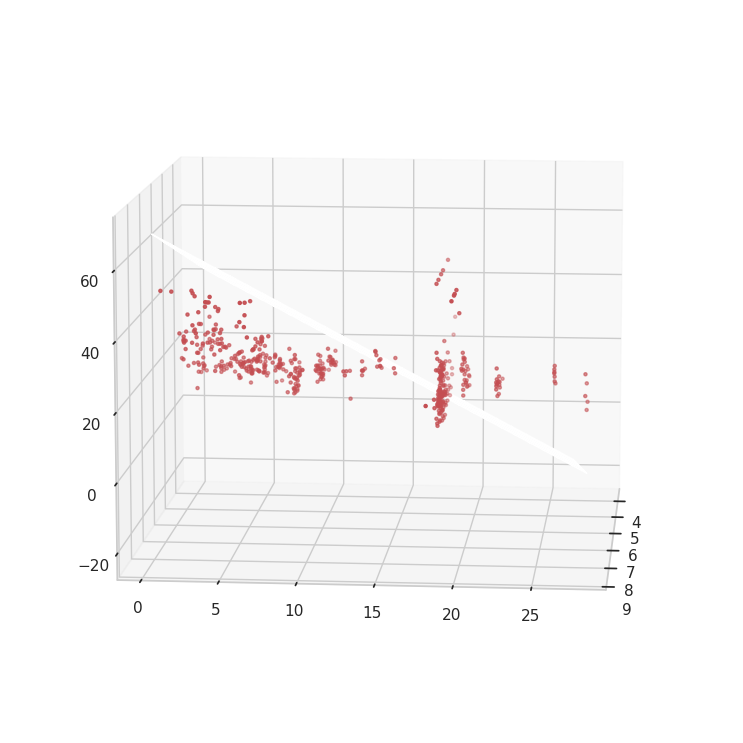

In [52]:

x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())

X1, X2 = np.meshgrid(x1_range,x2_range)

plano = pd.DataFrame({'RM':X1.ravel(), 'INDUS':X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1,X2,pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color='r', marker='.')
ax.view_init(elev=10, azim=5)
plt.show()

## Generando predicción con el modelo

In [55]:
num_rooms_std = sc_x.transform(np.array([5.0,10]).reshape(1, -1))
price_std = slr.predict(num_rooms_std)
print('El precio en miles es de %.3f'%
      sc_y.inverse_transform(price_std))


El precio en miles es de 12.865


/tmp/ipykernel_2973/588850938.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('El precio en miles es de %.3f'%
